In [43]:
import os
import copy
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib.backends.backend_pdf import PdfPages

def smooth(x, alpha=0.02):
    _mean = copy.deepcopy(x)
    _std = np.zeros_like(x)
    for i in range(1, len(x)):
        _mean[i] = (1 - alpha) * _mean[i-1] + alpha * _mean[i]
        _std[i] = (1 - alpha) * _std[i-1] + alpha * np.square(x[i] - _mean[i])
    return _mean, np.sqrt(_std)

def rolling_window(array, window=1000):
    '''
    apply a rolling window to a np.ndarray

    :param array: (np.ndarray) the input Array
    :param window: (int) length of the rolling window
    :return: (np.ndarray) rolling window on the input array
    '''
    shape = array.shape[:-1] + (array.shape[-1] - window + 1, window)
    strides = array.strides + (array.strides[-1],)
    return np.lib.stride_tricks.as_strided(array, shape=shape, strides=strides)

def plot_one_line(y, color=None, label=None, smooth_rate=0.02, n=None):
    y = y[np.isfinite(y)]
    if n: y = y[:n]
    y_mean, y_std = smooth(y, alpha=smooth_rate)
    x = np.arange(len(y_mean))
    if y_std is not None:
        min_ = y_mean - y_std
        max_ = y_mean + y_std
        plt.fill_between(x, min_, max_, alpha=0.2, color=color)
    plt.plot(x, y_mean, label=label, color=color)

def plot(*args, **kargs):
    assert 'column' in kargs.keys()
    kargs.setdefault(None)
    
    for i, arg in enumerate(args):
        assert isinstance(arg, dict) and 'path' in arg.keys(), arg
        csv = pd.read_csv(os.path.join(arg['path'], 'progress.csv'))
        plot_one_line(
            csv[kargs['column']].values, 
            color=arg.setdefault('color', f'C{i}'), 
            label=arg.setdefault('label', arg['path']),
            smooth_rate=arg.setdefault('smooth_rate', 0.02),
            n=kargs.setdefault('episodes', None)
        )
        print('plotting', os.path.join(arg['path'], 'progress.csv'))
    
    plt.title(kargs.setdefault('title', kargs['column'])),
    plt.xlabel(kargs.setdefault('xlabel', 'episode')),
    plt.grid(color='white')
    plt.legend()
    for arg in args:
        plt.savefig(os.path.join(arg['path'], f'{kargs["column"]}.png'))
    plt.show()


plotting logs/BreakoutNoFrameskip-v4/baseline/progress.csv
plotting logs/BreakoutNoFrameskip-v4/3/progress.csv
plotting logs/BreakoutNoFrameskip-v4/0/progress.csv
plotting logs/BreakoutNoFrameskip-v4/1/progress.csv
plotting logs/BreakoutNoFrameskip-v4/2/progress.csv
plotting logs/BreakoutNoFrameskip-v4/4/progress.csv


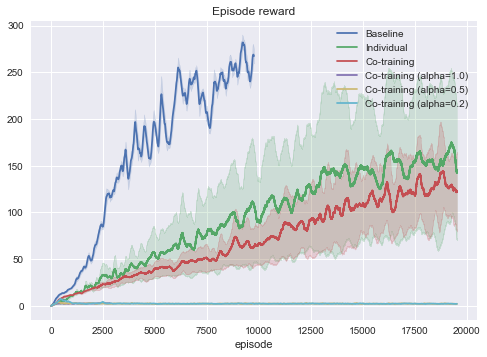

In [50]:
plot(
    {
        'path': 'logs/BreakoutNoFrameskip-v4/baseline/', 
        'label': 'Baseline',
    }, {
        'path': 'logs/BreakoutNoFrameskip-v4/3/', 
        'label': 'Individual'
    }, {
        'path': 'logs/BreakoutNoFrameskip-v4/0/', 
        'label': 'Co-training'
    }, {
        'path': 'logs/BreakoutNoFrameskip-v4/1/', 
        'label': 'Co-training (alpha=1.0)'
    }, {
        'path': 'logs/BreakoutNoFrameskip-v4/2/', 
        'label': 'Co-training (alpha=0.5)'
    }, {
        'path': 'logs/BreakoutNoFrameskip-v4/4/', 
        'label': 'Co-training (alpha=0.2)'
    },
    column='ep_reward_mean', title='Episode reward')


plotting logs/PongNoFrameskip-v4/2000000_steps_peer0_cliped/progress.csv
plotting logs/PongNoFrameskip-v4/2000000_steps_peer1_cliped/progress.csv
plotting logs/PongNoFrameskip-v4/2000000_steps_peer0dot5_cliped/progress.csv
plotting logs/PongNoFrameskip-v4/2000000_steps_peer0dot2/progress.csv


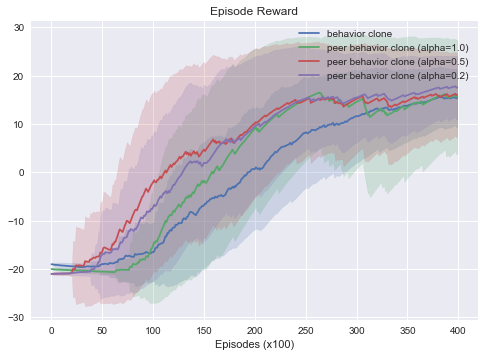

In [51]:
plot(
    {
        'path': 'logs/PongNoFrameskip-v4/2000000_steps_peer0_cliped/', 
        'label': 'behavior clone',
    }, {
        'path': 'logs/PongNoFrameskip-v4/2000000_steps_peer1_cliped/',
        'label': 'peer behavior clone (alpha=1.0)',
    }, {
        'path': 'logs/PongNoFrameskip-v4/2000000_steps_peer0dot5_cliped/',
        'label': 'peer behavior clone (alpha=0.5)',
    }, {
        'path': 'logs/PongNoFrameskip-v4/2000000_steps_peer0dot2/',
        'label': 'peer behavior clone (alpha=0.2)',
    },
    column='ep_reward_mean', xlabel='Episodes (x100)', title='Episode Reward',
    episodes=400,
)

plotting logs/PongNoFrameskip-v4/individual/progress.csv
plotting logs/PongNoFrameskip-v4/copier/progress.csv
plotting logs/PongNoFrameskip-v4/peer1_start200000/progress.csv
plotting logs/PongNoFrameskip-v4/peer0dot5_start200000/progress.csv
plotting logs/PongNoFrameskip-v4/peer0dot2_start200000/progress.csv


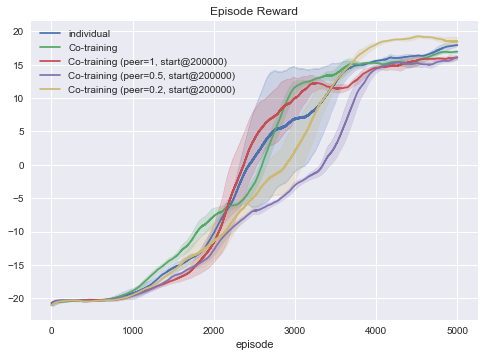

In [47]:
plot(
    {
        'path': 'logs/PongNoFrameskip-v4/individual/',
        'label': 'individual',
    }, {
        'path': 'logs/PongNoFrameskip-v4/copier/',
        'label': 'Co-training',
    }, {
    #     'path': 'logs/PongNoFrameskip-v4/peer1',
    #     'label': 'Co-training (peer=1)',
    # }, {
    #     'path': 'logs/PongNoFrameskip-v4/peer0dot5',
    #     'label': 'Co-training (peer=0.5)',
    # }, {
    #     'path': 'logs/PongNoFrameskip-v4/peer1_decay',
    #     'label': 'Co-training (peer=1, decay)',
    # }, {
        'path': 'logs/PongNoFrameskip-v4/peer1_start200000',
        'label': 'Co-training (peer=1, start@200000)',
    }, {
        'path': 'logs/PongNoFrameskip-v4/peer0dot5_start200000',
        'label': 'Co-training (peer=0.5, start@200000)',
    }, {
        'path': 'logs/PongNoFrameskip-v4/peer0dot2_start200000',
        'label': 'Co-training (peer=0.2, start@200000)',
    }, 
    column='ep_reward_mean', title='Episode Reward', episodes=5000,
)


plotting logs/PongNoFrameskip-v4/copier/progress.csv
plotting logs/PongNoFrameskip-v4/peer1_start200000/progress.csv
plotting logs/PongNoFrameskip-v4/peer0dot5_start200000/progress.csv
plotting logs/PongNoFrameskip-v4/peer0dot2_start200000/progress.csv


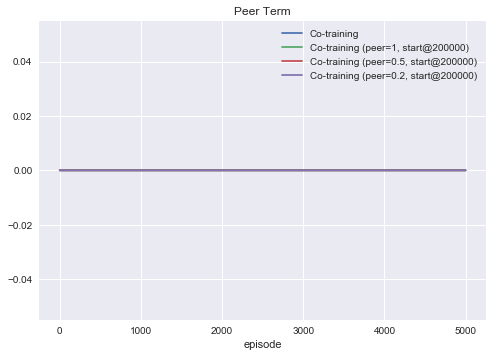

In [49]:

plot(
    {
        'path': 'logs/PongNoFrameskip-v4/copier/',
        'label': 'Co-training',
    }, {
    #     'path': 'logs/PongNoFrameskip-v4/peer1',
    #     'label': 'Co-training (peer=1)',
    # }, {
    #     'path': 'logs/PongNoFrameskip-v4/peer0dot5',
    #     'label': 'Co-training (peer=0.5)',
    # }, {
    #     'path': 'logs/PongNoFrameskip-v4/peer1_decay',
    #     'label': 'Co-training (peer=1, decay)',
    # }, {
        'path': 'logs/PongNoFrameskip-v4/peer1_start200000',
        'label': 'Co-training (peer=1, start@200000)',
    }, {
        'path': 'logs/PongNoFrameskip-v4/peer0dot5_start200000',
        'label': 'Co-training (peer=0.5, start@200000)',
    }, {
        'path': 'logs/PongNoFrameskip-v4/peer0dot2_start200000',
        'label': 'Co-training (peer=0.2, start@200000)',
    }, 
    column='peer term', title='Peer Term', episodes=5000,
)
